### dataset url : https://www.kaggle.com/siddharthm1698/coursera-course-dataset

### Here i am going to create recommendation system for the coursera courses based on course_title and students enrolled 

In [1]:
# importing dependencies
import numpy as np
import pandas  as pd


In [2]:
coursera  = pd.read_csv("coursera_data.csv")

In [3]:
coursera.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [4]:
coursera.columns

Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')

In [5]:
coursera.shape

(891, 7)

In [6]:
coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Unnamed: 0                  891 non-null int64
course_title                891 non-null object
course_organization         891 non-null object
course_Certificate_type     891 non-null object
course_rating               891 non-null float64
course_difficulty           891 non-null object
course_students_enrolled    891 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 48.8+ KB


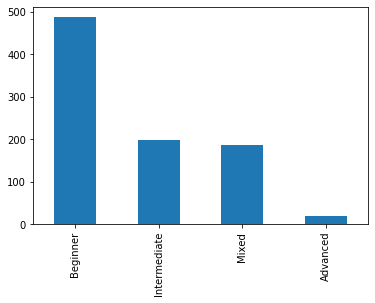

In [31]:
coursera["course_difficulty"].value_counts().plot(kind = 'bar')

In [8]:
#coursera["course_organization"].value_counts().head(10)

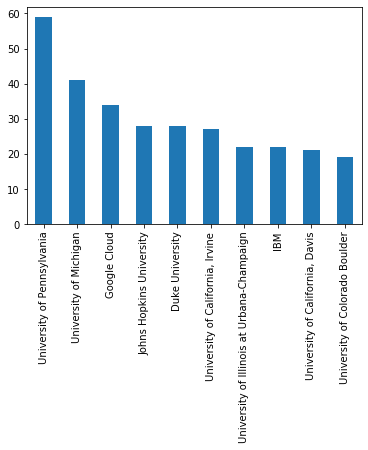

In [9]:
coursera["course_organization"].value_counts().head(10).plot(kind = "bar")

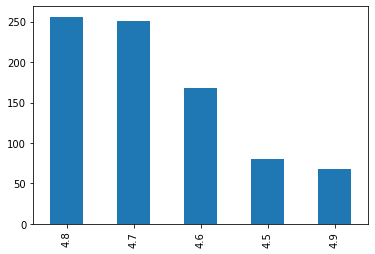

In [10]:
coursera["course_rating"].value_counts().head().plot(kind = 'bar')

In [11]:
# To create recommendation system we have to convert text into vectors .
# For this i am going to use tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 3,max_features = None,
                        analyzer = 'word',strip_accents = 'unicode',token_pattern = r'\w{1,}',
                       ngram_range = (1,3),# to create combination of multiple words
                       stop_words = 'english')
                        

In [12]:
tfidf_matrix = tfidf.fit_transform(coursera["course_title"])

In [13]:
tfidf_matrix.shape

(891, 337)

In [14]:
import sklearn.metrics.pairwise

In [15]:
# Here i am going to use sigmoid kernel for making similarity b/w 2 course title
sig = sklearn.metrics.pairwise.sigmoid_kernel(tfidf_matrix,tfidf_matrix)

In [16]:
#type(sig)

In [17]:
#sig[10]

In [18]:
indices = pd.Series(coursera["course_title"].index ,index = coursera["course_title"]).drop_duplicates()
indices

course_title
(ISC)² Systems Security Certified Practitioner (SSCP)                                         0
A Crash Course in Causality:  Inferring Causal Effects from Observational Data                1
A Crash Course in Data Science                                                                2
A Law Student's Toolkit                                                                       3
A Life of Happiness and Fulfillment                                                           4
ADHD: Everyday Strategies for Elementary Students                                             5
AI For Everyone                                                                               6
AI For Medical Treatment                                                                      7
AI Foundations for Everyone                                                                   8
AI for Medical Diagnosis                                                                      9
AI for Medical Prognosis   

In [19]:
#sig[indices["AI For Everyone"]]

In [20]:
#l = list(enumerate(sig[indices["AI For Everyone"]]))

In [21]:
#s = sorted(l,key = lambda x:x[1],reverse = True)

In [22]:
#s =s[1:6]

In [23]:
# i = [i[0] for i in s]

In [24]:
#coursera.iloc[i]

In [25]:
#c = coursera.copy()

In [26]:
#c.drop(columns = ['Unnamed: 0'],inplace = True)

In [27]:
#c.sort_values("course_students_enrolled",ascending = False)

In [28]:
#c.columns

In [29]:
def rec_for(title,sig = sig):
    print("Recommendation for {} :".format(title))
    idx = indices[title]  # finding index for the particular title
    
    sim_score = sig[idx]  # creating similarity score
    
    
    sim_score = list(enumerate(sim_score)) # creating list
    
    sorted_sim_score = sorted(sim_score,key = lambda x:x[1],reverse = True) # sorting sim_score 
    
    sorted_sim_score = sorted_sim_score[1:6]  # fetching 6 similar courses
    
    index = [i[0] for i in sorted_sim_score] # index for these 6 similar courses
    
    course = coursera.iloc[index] 
    
    course.drop(columns = ['Unnamed: 0'],inplace = True)
    
    
    return course.sort_values("course_students_enrolled",ascending = False)  # sorting similar courses based on students_enrolled
    
    
    
    

In [30]:
rec_for("AWS Fundamentals")

Recommendation for AWS Fundamentals :


C:\Users\harsh\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
14,AWS Fundamentals: Building Serverless Applicat...,Amazon Web Services,COURSE,4.7,Beginner,27k
348,Fundamentals of Immunology,Rice University,SPECIALIZATION,4.7,Intermediate,20k
16,AWS Fundamentals: Migrating to the Cloud,Amazon Web Services,COURSE,4.5,Intermediate,13k
13,AWS Fundamentals: Addressing Security Risk,Amazon Web Services,COURSE,4.3,Beginner,11k
15,AWS Fundamentals: Going Cloud-Native,Amazon Web Services,COURSE,4.7,Beginner,110k
